# ML Self project


## Author: Ivan Golov


## Mail: i.golov@innopolis.university



## Task 1

### 3.1. Linear Regression
#### Data reading

In [1]:
# import pandas package to work with dataframes
import pandas as pd

# Load the data from the file train_1.csv into a pandas dataframe
df = pd.read_csv("train_1.csv")

# Drop the column "Unnamed: 0" from the dataframe due to it being an index column
df = df.drop("Unnamed: 0",axis=1)

# Print the first 10 rows of the dataframe
df.head(10)




X_1       X_2       X_3       X_4           y
0 -1.924727  0.267947  0.596127 -1.150032   -5.195673
1  0.545333 -0.745503  2.773248 -0.975761  -20.118000
2 -1.833045  0.142620 -1.061453 -1.019242    0.630503
3 -1.297052 -0.857997  2.815755 -1.334396  -31.195297
4 -0.864305 -2.116955  6.347915  1.140341 -272.137746
5  1.795687  1.973620 -5.113603 -1.471940  127.632033
6  0.830451  2.417875 -7.219955 -1.808982  363.770821
7  0.205811 -0.370026  0.615315 -1.550593   -5.382155
8 -2.354931  1.026102 -2.882725  1.706066   20.446527
9  1.168741 -0.392934  0.858668 -1.509019   -3.181579

#### Train\validation splitting

In [2]:
# import sklearn package to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear regression model fitting

In [3]:
# import sklearn package to train a linear regression model
from sklearn.linear_model import LinearRegression

# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [4]:
# import sklearn package to calculate the metrics of the linear regression model
from sklearn import metrics

# ipoort numpy package to apply computations
import numpy as np

# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    print('MSE:', metrics.mean_squared_error(y_actual, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print('MAE:', metrics.mean_absolute_error(y_actual, y_pred))
    print('R2:', metrics.r2_score(y_actual, y_pred))

print_metrics(y_test, y_pred_lr)

MSE: 5682.7944456644345
RMSE: 75.3843116680416
MAE: 62.894718208198945
R2: 0.8560711773282678


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [5]:
# import necessary packages to solve the task
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [6]:
# Create a pipeline with polynomial features and linear regression

# instantiate the polynomial features with degree 2
polynomial_features = PolynomialFeatures(degree=2)

# instantiate the linear regression model
linear_regression = LinearRegression()

# create a pipeline with polynomial features and linear regression
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])

#### Tuning the degree hyper-parameter using GridSearch

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomial_features__degree': np.arange(2, 6)}

# Declare a GridSearch instance with the pipeline and the param_grid
grid_search_clf = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error')

# Fit the model
grid_search_clf.fit(X_train, y_train)

# Print the best parameter
print(f"Best parameter (CV score={grid_search_clf.best_score_}): {grid_search_clf.best_params_}")

# Prediction by model on the validation set
y_pred_new = grid_search_clf.predict(X_test)

Best parameter (CV score=-0.6219819548651347): {'polynomial_features__degree': 4}


In [8]:
# print core metrics to evaluate the model
print_metrics(y_test, y_pred_new)

MSE: 0.17244822426682638
RMSE: 0.4152688578100053
MAE: 0.3215379748633917
R2: 0.9999956323829539


#### Save the model

In [9]:
# import pickle package to save the model
import pickle 

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(grid_search_clf, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

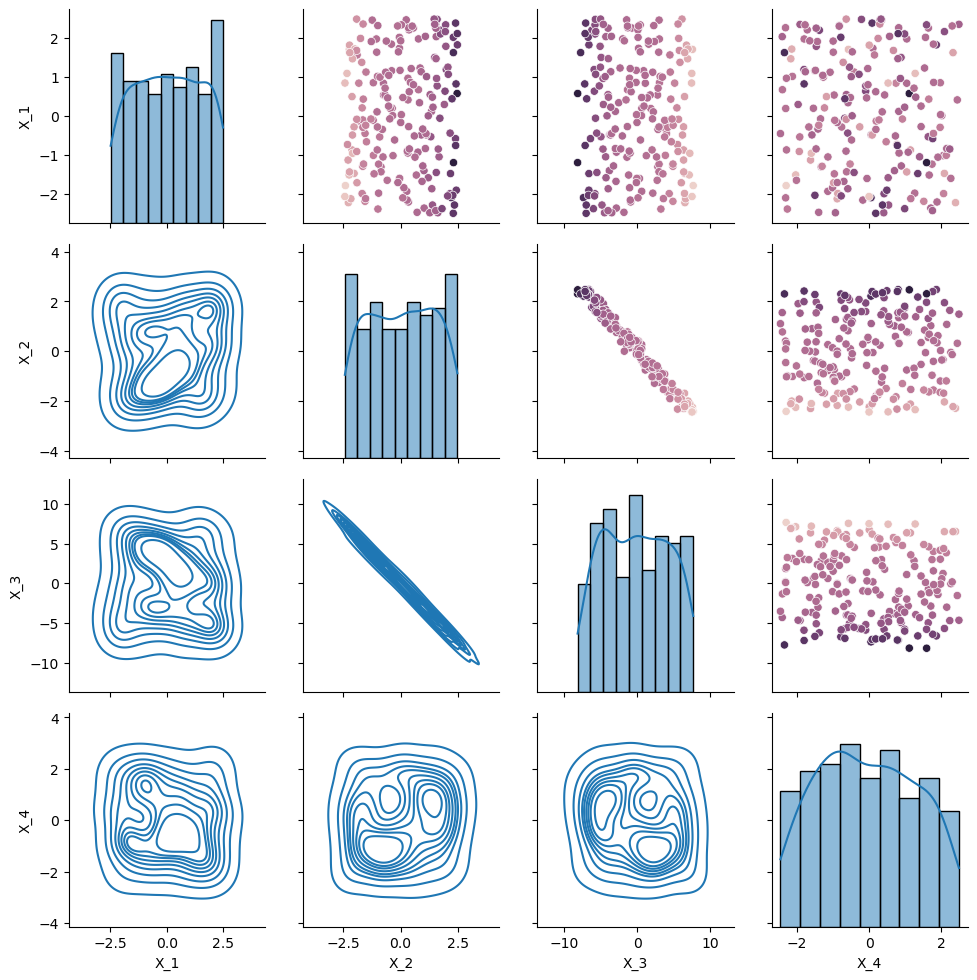

In [10]:
# Import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

# Create a PairGrid plot
pairplot = sns.PairGrid(X)

# Map the plots to the PairGrid
pairplot.map_upper(sns.scatterplot, hue=y)
pairplot.map_diag(sns.histplot, kde=True)
pairplot.map_lower(sns.kdeplot)

# Show the plot
plt.show()


I use scatter plot and Kernel Density Estimates(KDE) plot:

1) A scatter plot is a type of data visualization that displays individual data points on a two-dimensional graph. Each point represents the values of two variables, one plotted along the x-axis and the other along the y-axis. 

2) Kernel Density Estimate function creates a smooth curve that represents the estimated probability density of the given data. 

We can see that both plots show that between feature X_2 and feature X_3 we have strong overlapping (correlation) in terms of position on space (scatter plot) and probability distribution (Kernel Density Estimates).

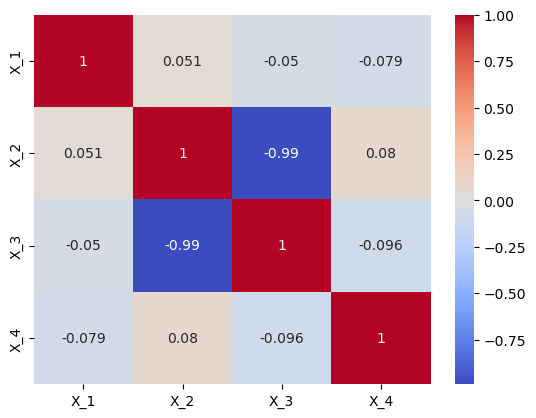

In [11]:
# create a correlation matrix
correlation_matrix = X.corr()

# plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

To identify the nature of relationship of features, I compute the correlation matrix and print the heatmap for it. We can see that feature X_2 and X_3 have a very strong relationship. A correlation coefficient of -0.99 indicates a strong negative linear relationship between this two variables. This means that as one variable increases, the other variable decreases in a nearly perfect linear fashion. The closer the correlation coefficient is to -1, the stronger the negative relationship between the variables.


## Task 2

### Data processing
#### Loading the dataset

In [12]:
# import the necessary packages to solve the task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Load the data from the file pokemon_modified.csv into a pandas dataframe
pdf = pd.read_csv("pokemon_modified.csv")

# Print the first 10 rows of the dataframe
pdf.head(10)


against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0         1.00           1.0             1.0               0.5            0.5   
1         1.00           1.0             1.0               0.5            0.5   
2         1.00           1.0             1.0               0.5            0.5   
3         0.50           1.0             1.0               1.0            0.5   
4         0.50           1.0             1.0               1.0            0.5   
5         0.25           1.0             1.0               2.0            0.5   
6         1.00           1.0             1.0               2.0            1.0   
7         1.00           1.0             1.0               2.0            1.0   
8         1.00           1.0             1.0               2.0            1.0   
9         1.00           1.0             1.0               1.0            1.0   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   
2            0.5           2.0             2.0            1.0           0.25   
3            1.0           0.5             1.0            1.0           0.50   
4            1.0           0.5             1.0            1.0           0.50   
5            0.5           0.5             1.0            1.0           0.25   
6            1.0           0.5             1.0            1.0           2.00   
7            1.0           0.5             1.0            1.0           2.00   
8            1.0           0.5             1.0            1.0           2.00   
9            0.5           2.0             2.0            1.0           0.50   

   ...  hp        name  percentage_male  type1  sp_attack  sp_defense  speed  \
0  ...  45   Bulbasaur             88.1  grass         65          65     45   
1  ...  60     Ivysaur             88.1  grass         80          80     60   
2  ...  80    Venusaur             88.1  grass        122         120     80   
3  ...  39  Charmander             88.1   fire         60          50     65   
4  ...  58  Charmeleon             88.1   fire         80          65     80   
5  ...  78   Charizard             88.1   fire        159         115    100   
6  ...  44    Squirtle             88.1  water         50          64     43   
7  ...  59   Wartortle             88.1  water         65          80     58   
8  ...  79   Blastoise             88.1  water        135         115     78   
9  ...  45    Caterpie             50.0    bug         20          20     45   

   weight_kg  generation  is_legendary  
0        6.9           1             0  
1       13.0           1             0  
2      100.0           1             0  
3        8.5           1             0  
4       19.0           1             0  
5       90.5           1             0  
6        9.0           1             0  
7       22.5           1             0  
8       85.5           1             0  
9        2.9           1             0  

[10 rows x 37 columns]

#### Exploring the dataset  and removing 2 redundant features

In [14]:
# Print the columns of the dataframe to indentify the features
print(pdf.columns)


Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classification',
       'defense', 'experience_growth', 'height_m', 'hp', 'name',
       'percentage_male', 'type1', 'sp_attack', 'sp_defense', 'speed',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')


In [15]:
# Print the info of the dataframe
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [16]:
# remove the two redundant features
pdf = pdf.drop(['name', 'classification'], axis=1)

In this dataset, two features appear redundant for our classification task of determining the legendary status of Pokémon. Specifically, the 'name' and 'classification' features contribute little to solving our objective. The Pokémon's name and its classification do not provide valuable information for predicting whether a Pokémon is legendary. Moreover, utilizing the feature 'classification' for encoding purposes introduces unnecessary columns, resulting in inefficiency and reduced suitability for our classification procedures.

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [17]:
# import the sklearn package to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
# Our dataser pdf stays the same and we not couse the data leakage

X = pdf.drop('is_legendary', axis=1)
y = pdf['is_legendary']

# It is better to split the data into training and testing sets after a preprocessing procedure
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Check if the dataset is balanced or not and comment on it

is_legendary
0    731
1     70
Name: count, dtype: int64


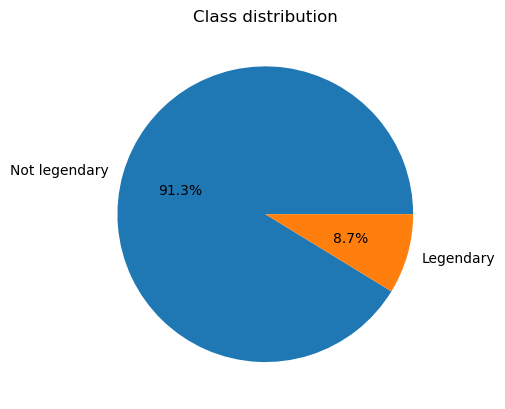

In [18]:
# Identify the balance of the classes in the target variable
class_distribution = pdf['is_legendary'].value_counts()

# Display class distribution
print(class_distribution)

# Plot the class distribution
plt.pie(class_distribution, labels=['Not legendary', 'Legendary'], autopct='%1.1f%%')

plt.title('Class distribution')

plt.show()


We can see that our labeled data for prediction the legendarity of Pokemons are very unbalanced of terms of classes. The highly unbalanced labeled data for predicting Pokémon legendarity can lead to potential problems: model bias, low sensitivity for the minority class, skewed evaluation metrics, and challenges in generalization. The imbalance may affect feature importance, necessitate specialized sampling techniques, and requires consideration of cost sensitivity.

#### Checking for missing values

In [19]:
# check for missing values in features set
X.isnull().sum()



against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
dtype: int64

#### Impute the missing values

In [20]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)


#### Double check that there are no missing values

In [21]:

# Check for missing values
X.isna().sum()


against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64

#### Encode categorically

In [22]:
# import the necessary package to encode the categorical features
from sklearn.preprocessing import OneHotEncoder

# Declare the OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit the encoder
f_names = ['type1']
encoded_feats = encoder.fit_transform(X[f_names])

# Create a dataframe with the encoded features
new_cols = pd.DataFrame(encoded_feats, columns=encoder.get_feature_names_out(f_names))

# Concatenate the new dataframe with the original one
new_df = pd.concat([X, new_cols], axis=1)

# Drop the original columns
new_df.drop(f_names, axis=1, inplace=True)

# Check the first 5 rows of the new dataframe
new_df.head()

against_bug against_dark against_dragon against_electric against_fairy  \
0         1.0          1.0            1.0              0.5           0.5   
1         1.0          1.0            1.0              0.5           0.5   
2         1.0          1.0            1.0              0.5           0.5   
3         0.5          1.0            1.0              1.0           0.5   
4         0.5          1.0            1.0              1.0           0.5   

  against_fight against_fire against_flying against_ghost against_grass  ...  \
0           0.5          2.0            2.0           1.0          0.25  ...   
1           0.5          2.0            2.0           1.0          0.25  ...   
2           0.5          2.0            2.0           1.0          0.25  ...   
3           1.0          0.5            1.0           1.0           0.5  ...   
4           1.0          0.5            1.0           1.0           0.5  ...   

  type1_ghost type1_grass type1_ground type1_ice type1_normal type1_poison  \
0         0.0         1.0          0.0       0.0          0.0          0.0   
1         0.0         1.0          0.0       0.0          0.0          0.0   
2         0.0         1.0          0.0       0.0          0.0          0.0   
3         0.0         0.0          0.0       0.0          0.0          0.0   
4         0.0         0.0          0.0       0.0          0.0          0.0   

  type1_psychic type1_rock type1_steel type1_water  
0           0.0        0.0         0.0         0.0  
1           0.0        0.0         0.0         0.0  
2           0.0        0.0         0.0         0.0  
3           0.0        0.0         0.0         0.0  
4           0.0        0.0         0.0         0.0  

[5 rows x 49 columns]

In [23]:
# Update the initial dataframe
X = new_df
X

against_bug against_dark against_dragon against_electric against_fairy  \
0           1.0          1.0            1.0              0.5           0.5   
1           1.0          1.0            1.0              0.5           0.5   
2           1.0          1.0            1.0              0.5           0.5   
3           0.5          1.0            1.0              1.0           0.5   
4           0.5          1.0            1.0              1.0           0.5   
..          ...          ...            ...              ...           ...   
796        0.25          1.0            0.5              2.0           0.5   
797         1.0          1.0            0.5              0.5           0.5   
798         2.0          0.5            2.0              0.5           4.0   
799         2.0          2.0            1.0              1.0           1.0   
800        0.25          0.5            0.0              1.0           0.5   

    against_fight against_fire against_flying against_ghost against_grass  \
0             0.5          2.0            2.0           1.0          0.25   
1             0.5          2.0            2.0           1.0          0.25   
2             0.5          2.0            2.0           1.0          0.25   
3             1.0          0.5            1.0           1.0           0.5   
4             1.0          0.5            1.0           1.0           0.5   
..            ...          ...            ...           ...           ...   
796           1.0          2.0            0.5           1.0          0.25   
797           2.0          4.0            1.0           1.0          0.25   
798           2.0          0.5            1.0           0.5           0.5   
799           0.5          1.0            1.0           2.0           1.0   
800           1.0          2.0            0.5           1.0           0.5   

     ... type1_ghost type1_grass type1_ground type1_ice type1_normal  \
0    ...         0.0         1.0          0.0       0.0          0.0   
1    ...         0.0         1.0          0.0       0.0          0.0   
2    ...         0.0         1.0          0.0       0.0          0.0   
3    ...         0.0         0.0          0.0       0.0          0.0   
4    ...         0.0         0.0          0.0       0.0          0.0   
..   ...         ...         ...          ...       ...          ...   
796  ...         0.0         0.0          0.0       0.0          0.0   
797  ...         0.0         1.0          0.0       0.0          0.0   
798  ...         0.0         0.0          0.0       0.0          0.0   
799  ...         0.0         0.0          0.0       0.0          0.0   
800  ...         0.0         0.0          0.0       0.0          0.0   

    type1_poison type1_psychic type1_rock type1_steel type1_water  
0            0.0           0.0        0.0         0.0         0.0  
1            0.0           0.0        0.0         0.0         0.0  
2            0.0           0.0        0.0         0.0         0.0  
3            0.0           0.0        0.0         0.0         0.0  
4            0.0           0.0        0.0         0.0         0.0  
..           ...           ...        ...         ...         ...  
796          0.0           0.0        0.0         1.0         0.0  
797          0.0           0.0        0.0         0.0         0.0  
798          0.0           0.0        0.0         0.0         0.0  
799          0.0           1.0        0.0         0.0         0.0  
800          0.0           0.0        0.0         1.0         0.0  

[801 rows x 49 columns]

#### Scale the data

In [24]:
# import the necessary package to scale the categorical features
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# feature scaling using the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X)

# Transform the features
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

#### Сorrelation Matrix

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

In [25]:
def plot_heatmap(X):
    # Create a figure
    plt.figure(figsize=(100, 100))

    # Plot the correlation matrix of the features
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
    plt.show()

plot_heatmap(X)

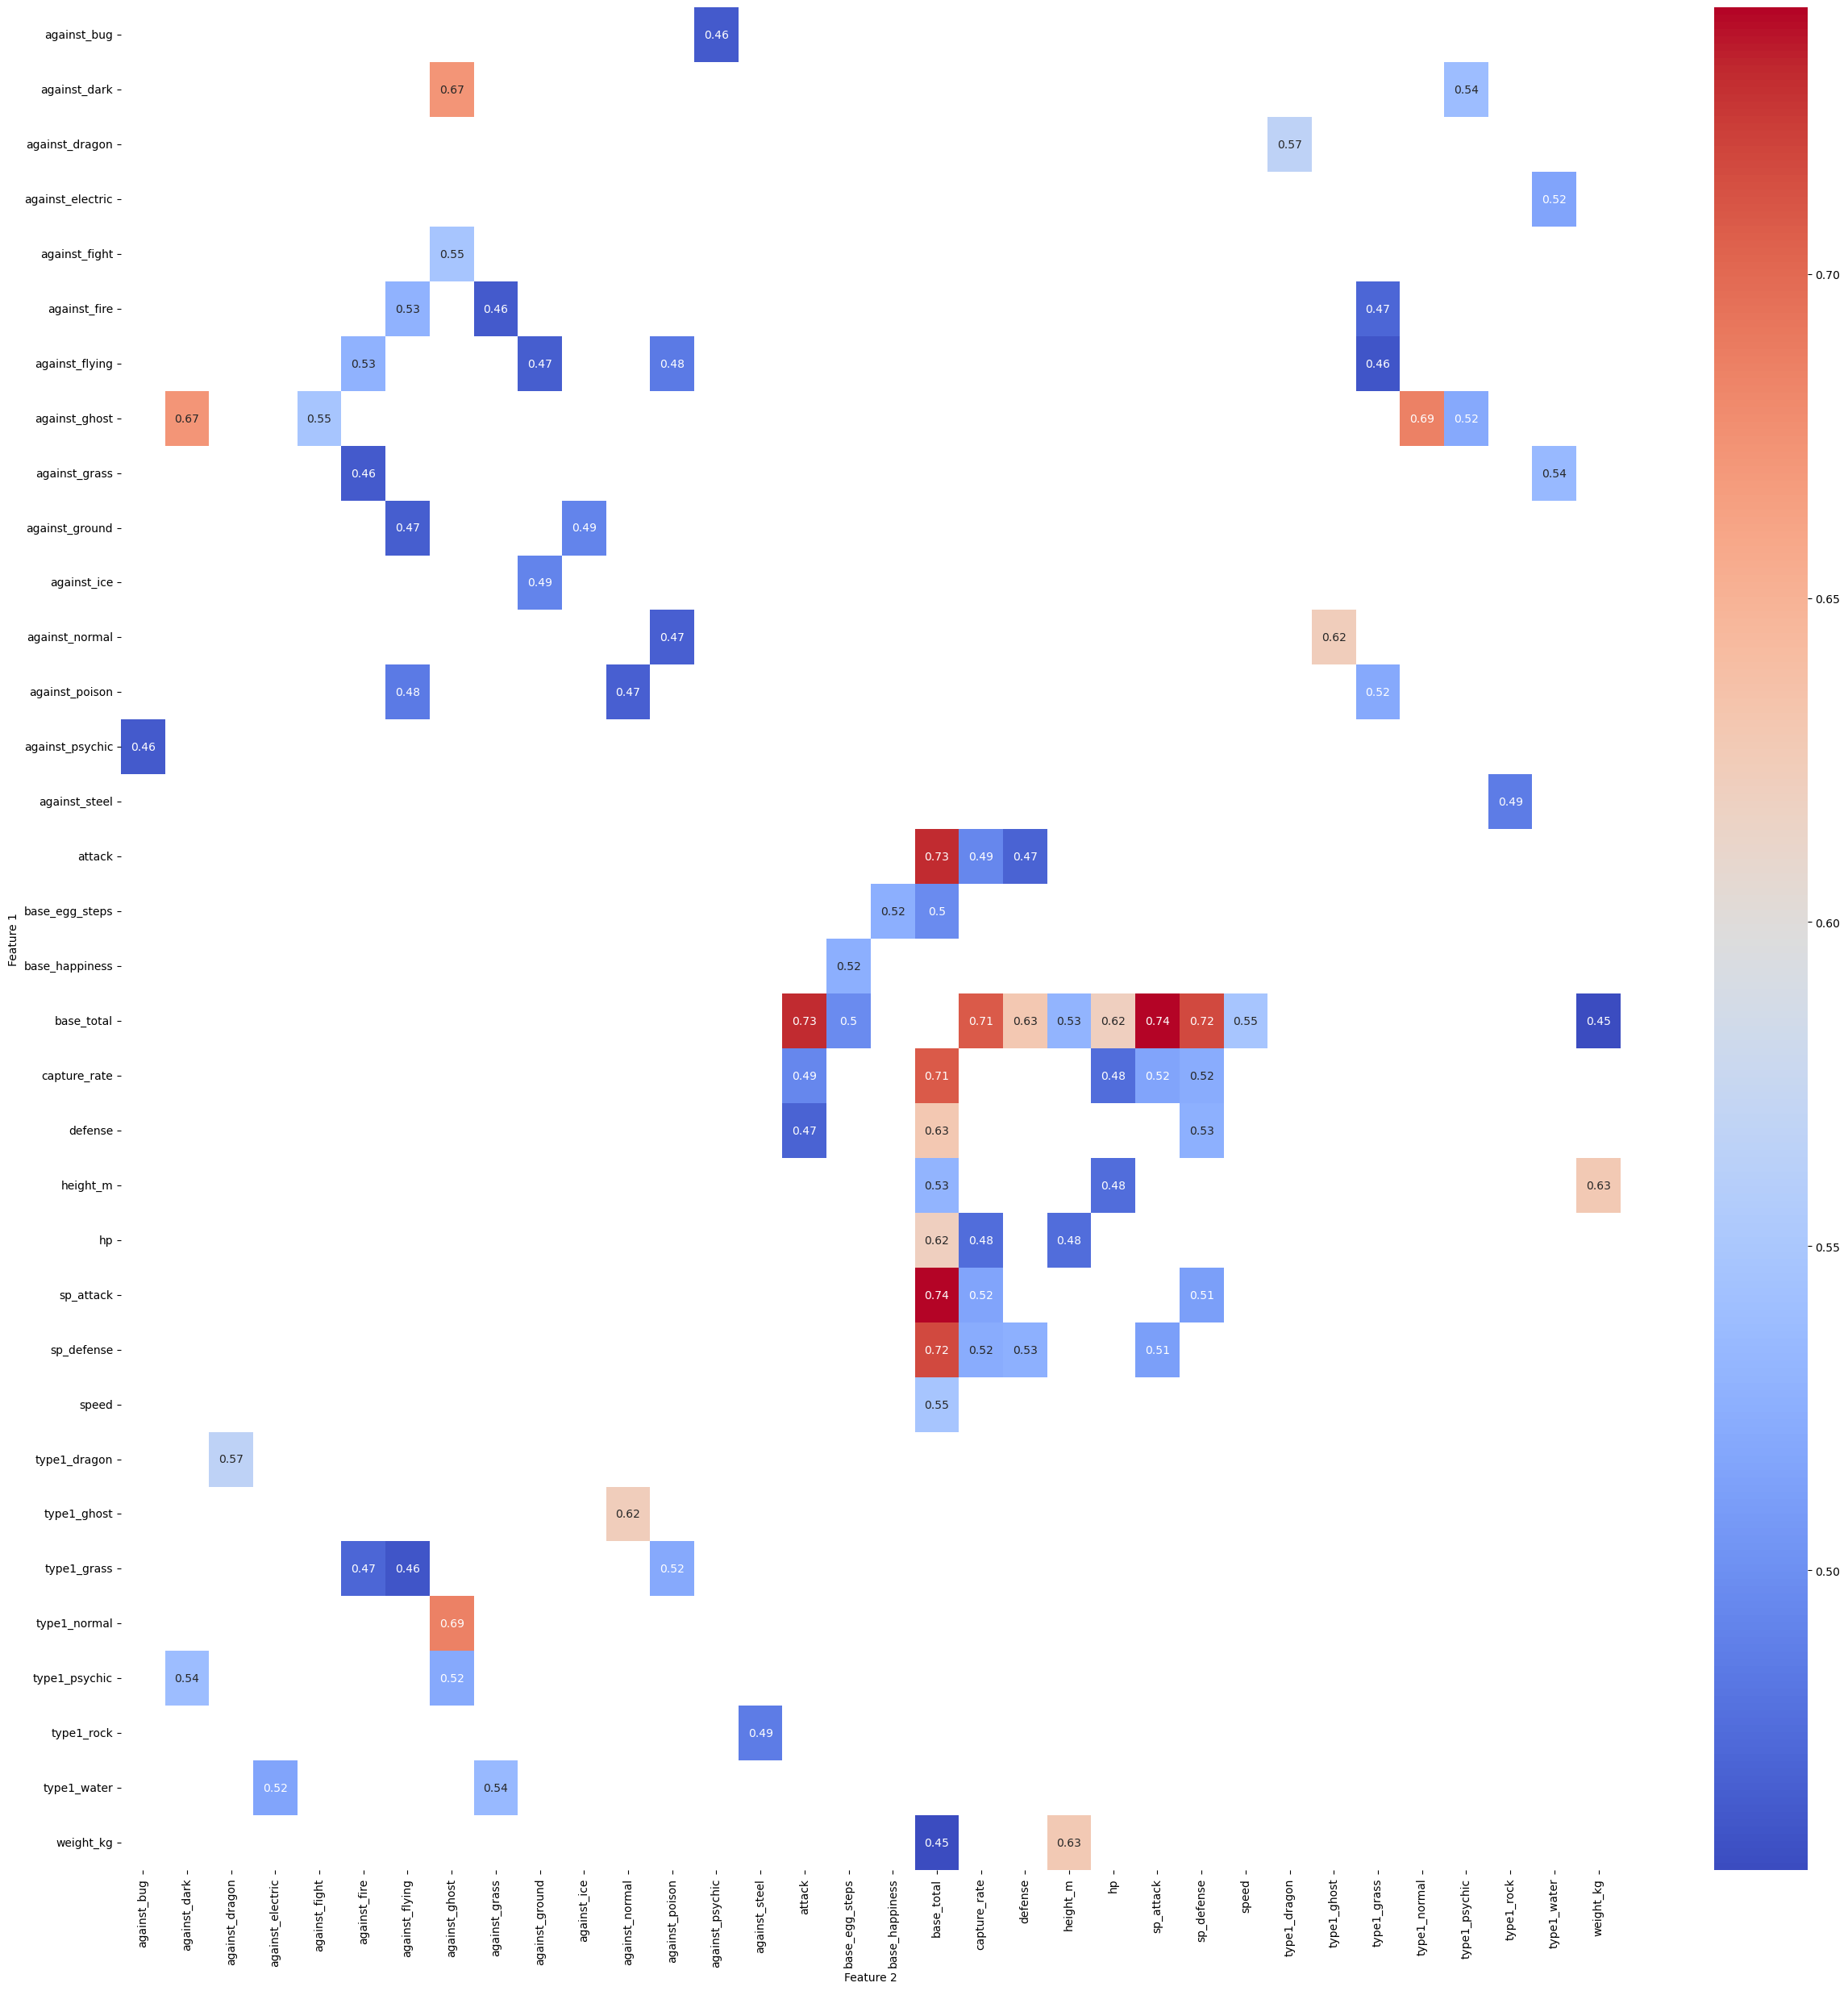

In [26]:
# Extract the most correlated features and show the updated correlation matrix to better understand the relationships between the features

# define a function to show the most correlated features
def show_correlated_features_map(X):
    
    # Calculate the correlation matrix
    corr_matrix = X.corr().abs()
    
    # Unstack the matrix and convert to a DataFrame
    corr_unstacked = corr_matrix.unstack().sort_values(kind="quicksort").reset_index()

    # Rename the columns
    corr_unstacked.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Remove self correlations
    corr_unstacked = corr_unstacked[corr_unstacked['Feature 1'] != corr_unstacked['Feature 2']]

    # Get absolute values of correlations
    corr_unstacked['Correlation'] = corr_unstacked['Correlation'].abs()

    # Sort by correlation
    corr_unstacked = corr_unstacked.sort_values(by='Correlation', ascending=False)

    # Select top N pairs
    top_pairs = corr_unstacked.head(80)  

    # Plot these pairs
    plt.figure(figsize=(30, 30))
    sns.heatmap(top_pairs.pivot(index='Feature 1', columns='Feature 2', values='Correlation'), annot=True, cmap='coolwarm')
    plt.show()

show_correlated_features_map(X)


The correlation matrix, visualized in a heatmap, reveals multiple highly correlated features with coefficients exceeding 0.6. This indicates potential issues during the fitting procedure, including multicollinearity, overfitting, reduced model interpretability, sensitivity to small changes, numerical instability, impaired generalization, and the inclusion of redundant information. The presence of such correlated features may lead to challenges in accurately estimating model parameters and hinder the model's ability to generalize effectively to new data.

### Additional data predprocessing to reduce the number of high correlated features

In [27]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Replace diagonal of correlation matrix with 0s to avoid dropping the same feature
np.fill_diagonal(corr_matrix.values, 0)

# Find features with correlation greater than 0.65
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.65)]

# Drop highly correlated features 
X_updated = X.drop(X[to_drop], axis=1)

In [28]:
# Observe the updated dataframe
X_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dragon     801 non-null    float64
 2   against_electric   801 non-null    float64
 3   against_fairy      801 non-null    float64
 4   against_fight      801 non-null    float64
 5   against_fire       801 non-null    float64
 6   against_flying     801 non-null    float64
 7   against_grass      801 non-null    float64
 8   against_ground     801 non-null    float64
 9   against_ice        801 non-null    float64
 10  against_normal     801 non-null    float64
 11  against_poison     801 non-null    float64
 12  against_psychic    801 non-null    float64
 13  against_rock       801 non-null    float64
 14  against_steel      801 non-null    float64
 15  against_water      801 non-null    float64
 16  base_egg_steps     801 non

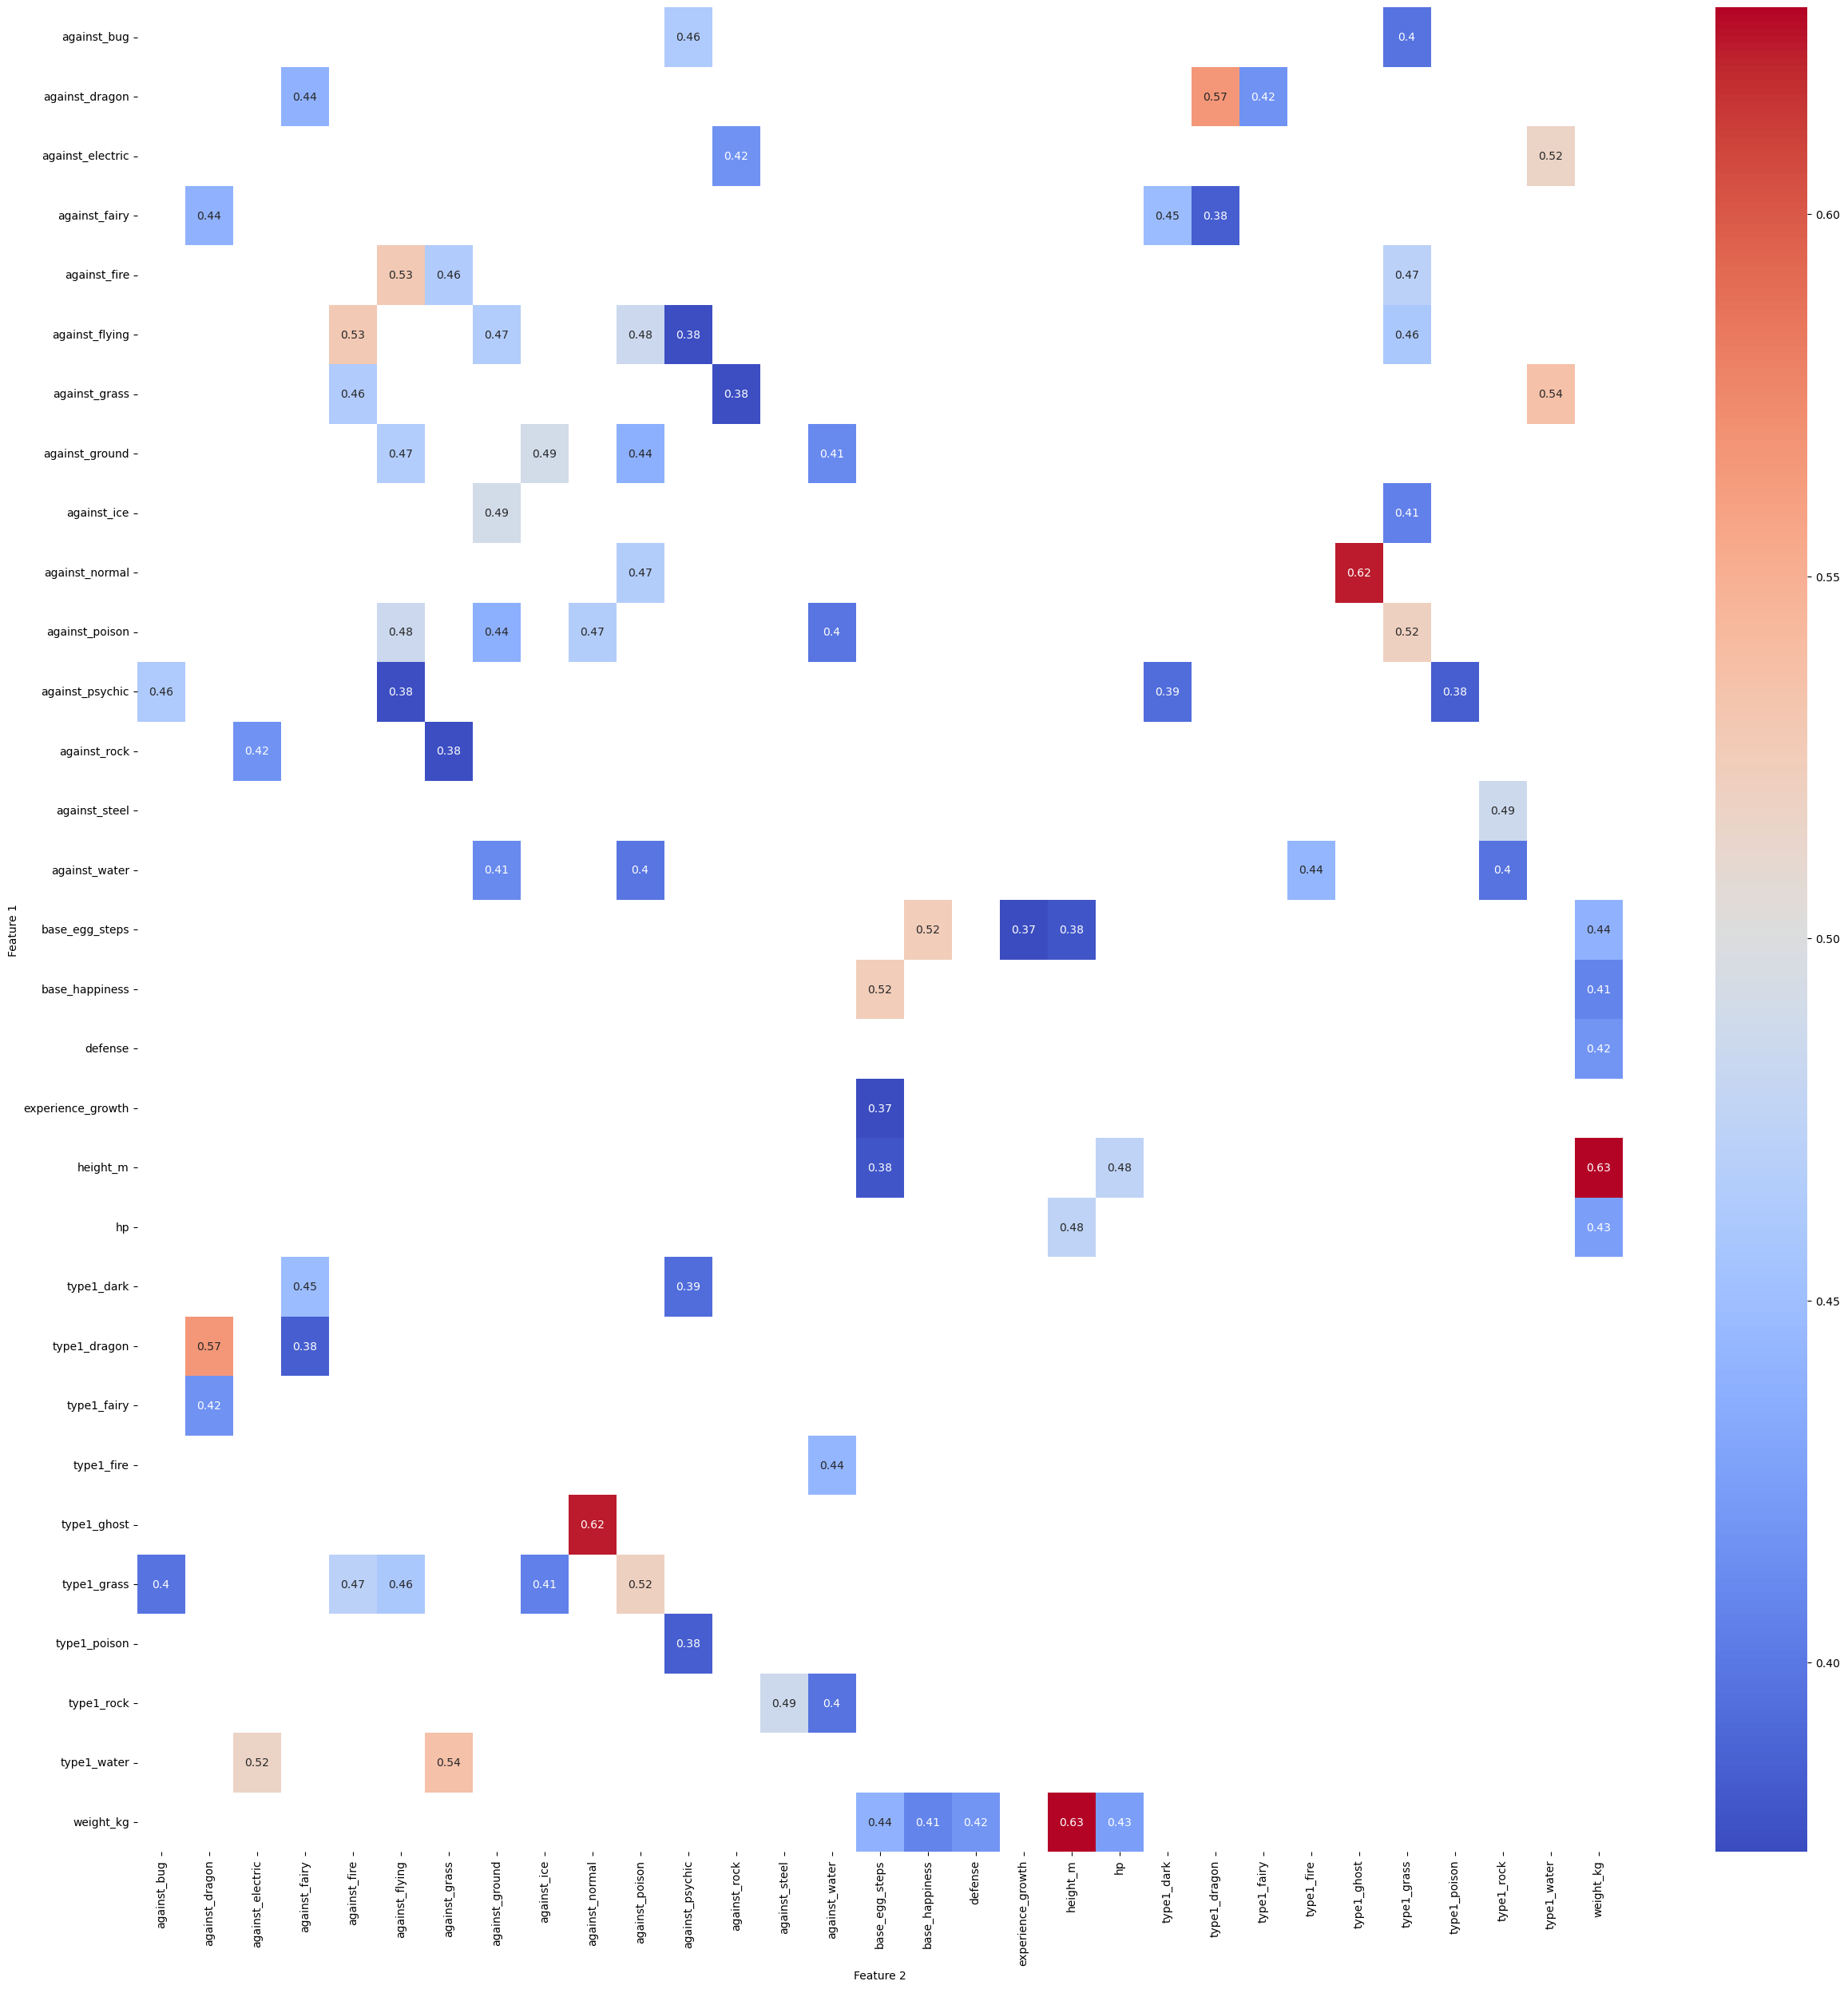

In [29]:
# show the updated correlation matrix
show_correlated_features_map(X_updated)

In [30]:
# plot the whole heatmap of the updated correlation matrix to see the changes in the relationships between the features
plot_heatmap(X_updated)

After applying additional data preprocessing, I can reduce the number of highly correlated features with coefficients greater than 0.65. I believe that this procedure will help enhance the feature set and improve the metrics for future trained models.

### Model fitting and Comparison

In [31]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, random_state=123)

#### Tuning LR model

In [32]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 
# import the necessary package to calculate the metrics
from sklearn import metrics

metrics_list = []

# define a function to print the classification metrics
def print_clf_metrics(y_actual, y_pred):
    print('Accuracy:', metrics.accuracy_score(y_actual, y_pred))
    print('Precision:', metrics.precision_score(y_actual, y_pred))
    print('Recall:', metrics.recall_score(y_actual, y_pred))
    print('F1:', metrics.f1_score(y_actual, y_pred))

# define a function to save the metrics
def save_metrics(model_name, y_actual, y_pred):
    metrics_dict = {'Accuracy': metrics.accuracy_score(y_actual, y_pred),
                    'Precision': metrics.precision_score(y_actual, y_pred),
                    'Recall': metrics.recall_score(y_actual, y_pred),
                    'F1': metrics.f1_score(y_actual, y_pred),
                    'Model': model_name},
    
    return metrics_dict

In [33]:
# define the tuned hyperparameters for the logistic regression model
lr_parameters = [{'penalty': ['l2'], 'C': np.logspace(-3,3,7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']},
                 {'penalty': ['l1'], 'C': np.logspace(-3,3,7), 'solver': ['liblinear']}
                ]


In [34]:
# import the necessary packages to solve the task
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# save the best parameters and the best score
best_params = None
best_score = 0

for param in lr_parameters:
    # Declare and train logistic regression inside GridSearchCV with the parameters above
    
    logistic_regression = LogisticRegression()

    lr_clf_gs = GridSearchCV(logistic_regression, param_grid=param, cv=5, scoring='f1')

    # Fit the model
    lr_clf_gs.fit(X_train, y_train)

    # Compute the predictions
    y_pred_lr = lr_clf_gs.predict(X_test)

    if lr_clf_gs.best_score_ > best_score:
        best_score = lr_clf_gs.best_score_
        best_params = lr_clf_gs.best_params_

# Print the best parameters
print(f"Best parameters (CV score={best_score}): {best_params}")


Best parameters (CV score=0.9290696438064859): {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


#### Construct a LR with the best params and Evaluate the LR with the best params

In [35]:
# Declare and train logistic regression with the best parameters
lr_clf = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], max_iter=1000)

# Fit the model
lr_clf.fit(X_train, y_train)

lr_y_pred = lr_clf.predict(X_test)

In [36]:
# print and save the metrics of the best model
print_clf_metrics(y_test, lr_y_pred)
metrics_list.append(save_metrics('Logistic Regression', y_test, lr_y_pred))


Accuracy: 0.9875776397515528
Precision: 0.9411764705882353
Recall: 0.9411764705882353
F1: 0.9411764705882353


#### Print the top 5 most influencing features and the top 5 ignored features

In [37]:
# Get the coefficients of the logistic regression model
coefficients = lr_clf.coef_[0]

# Get the absolute values of the coefficients
abs_coefficients = np.abs(coefficients)

# Sort the absolute coefficients in descending order
sorted_indices = np.argsort(abs_coefficients)[::-1]

# Get the top 5 most influencing features
top_influencing_features = X_train.columns[sorted_indices[:5]]

# Get the top 5 ignored features
top_ignored_features = X_train.columns[sorted_indices[-5:]]

# Print the top 5 most influencing features
print("Top 5 most influencing features:")
for feature in top_influencing_features:
    print(feature)

# Print the top 5 ignored features
print("\nTop 5 ignored features:")
for feature in top_ignored_features:
    print(feature)



Top 5 most influencing features:
base_egg_steps
against_dragon
speed
experience_growth
type1_water

Top 5 ignored features:
type1_dark
generation
weight_kg
percentage_male
against_bug


#### Tuning KNN model

In [38]:
# import the necessary packages to solve the task
from sklearn.neighbors import KNeighborsClassifier

# Declare tuned hyperparameters for the KNN model
param_grid = {'n_neighbors': np.arange(1,15), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan','chebyshev','cosine']}

# Declare and train KNN inside GridSearchCV with the parameters above
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
knn_clf_gs.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters (CV score={knn_clf_gs.best_score_}): {knn_clf_gs.best_params_}")

Best parameters (CV score=0.9546875): {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [39]:
# Declare and train KNN with the best parameters

best_params_knn = knn_clf_gs.best_params_

knn_clf = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'], metric=best_params_knn['metric'])

# Fit the model
knn_clf.fit(X_train, y_train)

# Compute the predictions
knn_y_pred = knn_clf.predict(X_test)

# print and save the metrics of the best model
print_clf_metrics(y_test, knn_y_pred)
metrics_list.append(save_metrics('KNN', y_test, knn_y_pred))

Accuracy: 0.968944099378882
Precision: 0.9285714285714286
Recall: 0.7647058823529411
F1: 0.8387096774193549


#### Fitting GNB to the data and evaluating on the test dataset

In [40]:
# import the necessary packages to solve the task
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 

gauss_nb_clf = GaussianNB()

# Fit the model
gauss_nb_clf.fit(X_train, y_train)

# Compute the predictions
gauss_y_pred = gauss_nb_clf.predict(X_test)

# print and save the metrics of the GaussianNB model
print_clf_metrics(y_test, gauss_y_pred)
metrics_list.append(save_metrics('GaussianNB', y_test, gauss_y_pred))

Accuracy: 0.8695652173913043
Precision: 0.4444444444444444
Recall: 0.9411764705882353
F1: 0.6037735849056604


#### Which metric is most appropriate for this task and why?

In our context of determining the legendarity of Pokémon, where the classes ('legendary' or 'not legendary') distribution be very imbalanced, using a combination of precision, recall, and F1 score is more informative and effective than relying solely on accuracy. These metrics provide a more nuanced understanding of the model's performance, especially in scenarios where misclassifying legendary Pokémon has different consequences than misclassifying non-legendary Pokémon (using this metrics we can understand the misclassification nature and potential biases of models on unbalanced data). 

#### Explain what kind of error (false negative or false positive) is more critical for this data set ?

In the context of predicting whether a Pokemon is legendary or not, understanding the implications of false positives and false negatives is crucial. Let's define false positives and false negatives in the context of our classification problem:

1. **False Positive (Type I Error):**
   - *Definition:* Predicting a Pokemon as legendary when it is not.
   - *Implication:* This error would mean misclassifying a regular Pokemon as legendary. In the context of your imbalanced dataset, false positives could lead to unnecessary actions or decisions based on the misconception that a non-legendary Pokemon is actually legendary.

2. **False Negative (Type II Error):**
   - *Definition:* Predicting a Pokemon as non-legendary when it is legendary.
   - *Implication:* This error would mean failing to recognize a legendary Pokemon. In the imbalanced dataset, false negatives could lead to overlooking or neglecting a legendary Pokemon, which might be a significant miss, especially if legendary Pokemon have special characteristics, abilities, or rarity that you want to identify.

Now, considering the imbalance in the dataset and the specific nature of the prediction task, the more critical error depends on our priorities:

- If correctly identifying legendary Pokemon is more important and false negatives have higher consequences (e.g., for research, rarity, or specific game strategies), then minimizing false negatives is critical.

- If avoiding unnecessary actions or decisions related to regular Pokemon being misclassified as legendary is more important, and false positives have higher consequences, then minimizing false positives is critical.

From my perspective, the more crucial aspect is the misclassification of False Negatives. This is because, given the imbalanced nature of our dataset, inaccurately classifying legendary Pokémon as non-legendary could diminish the significance of the legendary class and introduce bias into the model duting the training procedure.


#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

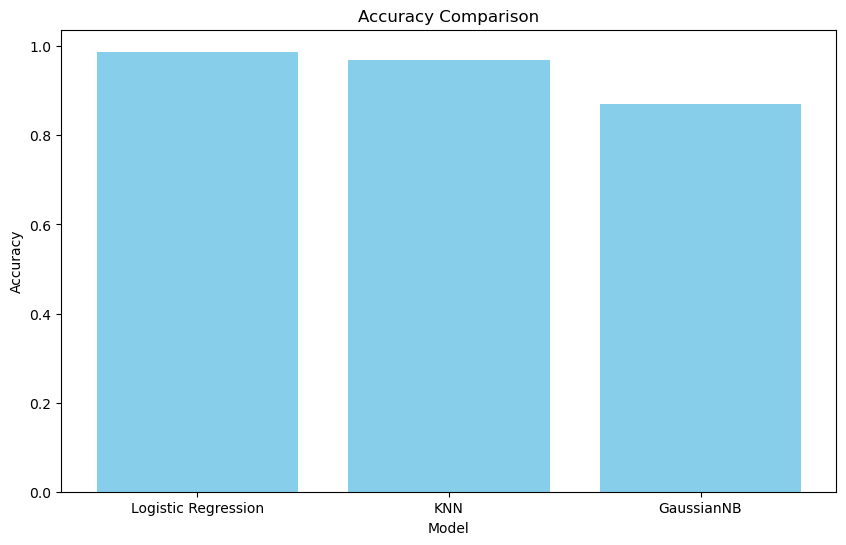

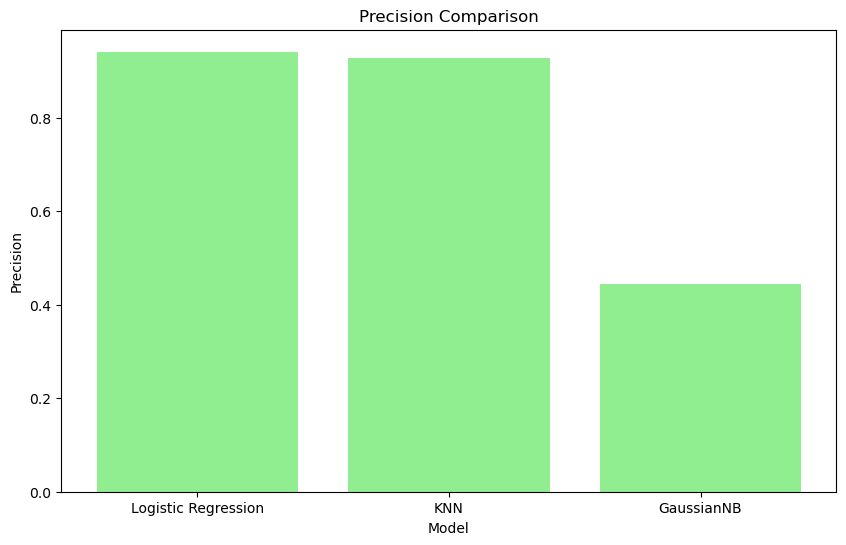

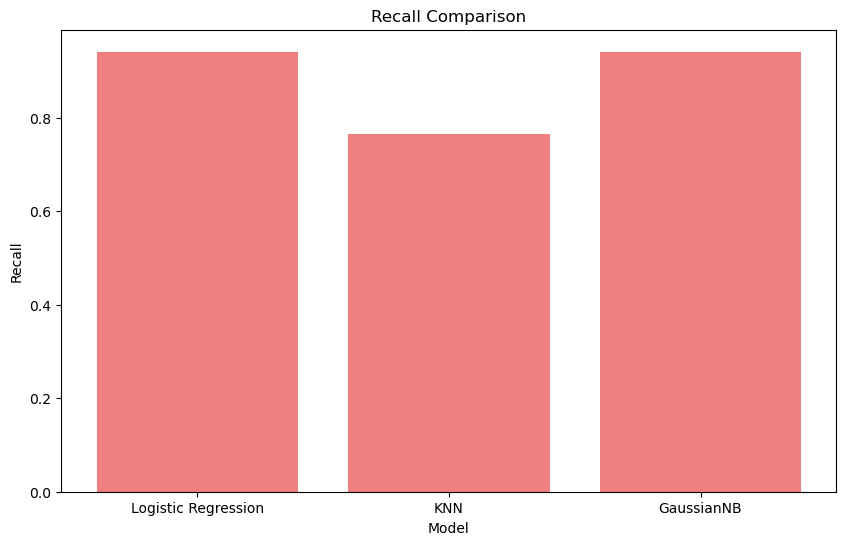

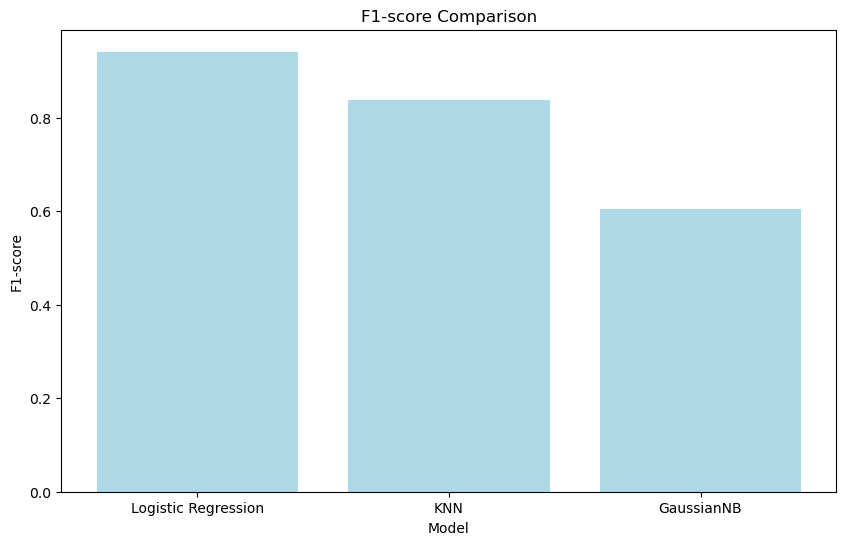

In [41]:
metrics_list
import matplotlib.pyplot as plt

# Extract the metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for metrics_dict in metrics_list:
    model_names.append(metrics_dict[0]['Model'])
    accuracies.append(metrics_dict[0]['Accuracy'])
    precisions.append(metrics_dict[0]['Precision'])
    recalls.append(metrics_dict[0]['Recall'])
    f1_scores.append(metrics_dict[0]['F1'])

# Plot the accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Plot the precision for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, precisions, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison')

# Plot the recall for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, recalls, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison')

# Plot the F1-score for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color='lightblue')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')

plt.show()



## Logistic Regression Outperforms Other Models

The following plots indicate that the Logistic Regression model outperforms the KNN (K-Nearest Neighbors) and Gaussian Naive Bayes models across various evaluation metrics:

1. **Accuracy:**
   - *Logistic Regression:* Achieves the highest accuracy of 98.76%, indicating the proportion of correctly classified instances out of the total.
   - *KNN and Gaussian Naive Bayes:* Have lower accuracies of 96.89% and 86.96%, respectively.

2. **Precision:**
   - *Logistic Regression:* Shows the highest precision of 94.12%, meaning that when it predicts a Pokémon as legendary, it is correct 94.12% of the time.
   - *KNN:* Has a slightly lower precision of 92.86%.
   - *Gaussian Naive Bayes:* Exhibits the lowest precision at 44.44%, indicating a higher rate of false positives.

3. **Recall:**
   - *Logistic Regression:* Achieves a recall of 94.12%, indicating its ability to correctly identify 94.12% of actual legendary Pokémon.
   - *KNN:* Demonstrates a lower recall of 76.47%, indicating it may miss some actual legendary Pokémon.
   - *Gaussian Naive Bayes:* Shows a high recall of 94.12%, but this comes at the cost of lower precision.

4. **F1 Score:**
   - *Logistic Regression:* Attains the highest F1 score of 94.12%, striking a good balance between precision and recall.
   - *KNN:* Has an F1 score of 83.87%, reflecting a trade-off between precision and recall.
   - *Gaussian Naive Bayes:* Presents an F1 score of 60.38%, indicating a larger trade-off between precision and recall.




# Summary: 

Logistic Regression emerges as the most suitable model for predicting Pokémon legendarity when compared to Gaussian Naive Bayes (Gauss) and K-Nearest Neighbors (KNN). The superiority of Logistic Regression is grounded in its robust performance metrics, adaptability to unbalanced datasets, and resilience to high feature correlations. The following detailed sentences support this idea:

### 1. Regularization and Hyperparameters:
- Logistic Regression's incorporation of regularization techniques, such as L1 and L2 regularization, empowers the model with the ability to fine-tune hyperparameters, preventing overfitting and enhancing generalization. This flexibility is crucial, especially when dealing with unbalanced datasets.

### 2. Robustness to Correlation:
- Logistic Regression showcases resilience to multicollinearity due to its well-defined mathematical framework. The regularization terms effectively mitigate the impact of highly correlated features, ensuring stability and reliability in the presence of correlated predictors.

### 3. Model Interpretability:
- Logistic Regression provides transparent interpretability by assigning clear coefficients to each feature, facilitating a comprehensive understanding of their contributions to the prediction. This interpretability is essential for model transparency and trustworthiness.

### 4. Handling Unbalanced Datasets:
- Logistic Regression excels in managing imbalanced datasets by optimizing the log-likelihood function, inherently considering class distribution. This capability ensures robust performance, especially when dealing with minority classes, such as legendary Pokémon.

### 5. Scalability:
- Logistic Regression's scalability to large datasets surpasses that of KNN, as computing distances between data points in KNN can become computationally expensive. Logistic Regression's computational efficiency ensures its applicability to datasets of varying sizes.

In conclusion, the comprehensive analysis of Logistic Regression's regularization capabilities, resilience to correlation, interpretability, computational efficiency, adept handling of imbalanced datasets, and scalability collectively position it as the most effective model for predicting Pokémon legendarity in this specific classification task.


## 5. Bonus Task

#### Loading the Dataset

In [42]:
# import the necessary packages to solve the task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# create dataframes for the training and testing sets
train_data = pd.read_csv("bonus_train.csv")
test_data = pd.read_csv("bonus_test.csv")
print(train_data.head())
print(test_data.head())

        var1      var2        var3  target
0  63.973548  2.726496  379.882305       2
1  10.906092  5.529845  207.272945       1
2  73.482382  2.739803  335.491727       1
3  28.937856  3.666386  226.279807       0
4  33.315477  5.540084  159.608987       0
        var1      var2        var3  target
0  26.052523  4.698298  239.765969       1
1  62.205061  4.373559  207.581273       1
2  11.390621  4.494386  244.578095       0
3  35.320556  2.731171  322.284266       2
4  53.508643  3.575985  247.902236       1


In [44]:
# Split the data into features (X) and labels (y) into training and testing sets
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

/Users/ivangolov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


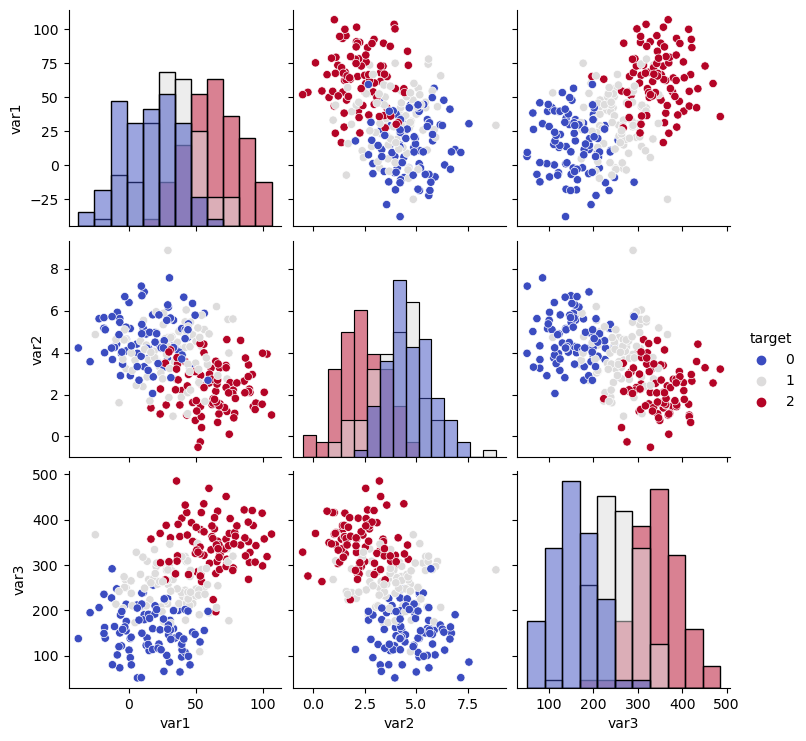

In [45]:
# ploting the pairplot of the training set
sns.pairplot(train_data, kind='scatter', hue='target', palette='coolwarm', diag_kind='hist')


<Axes: >

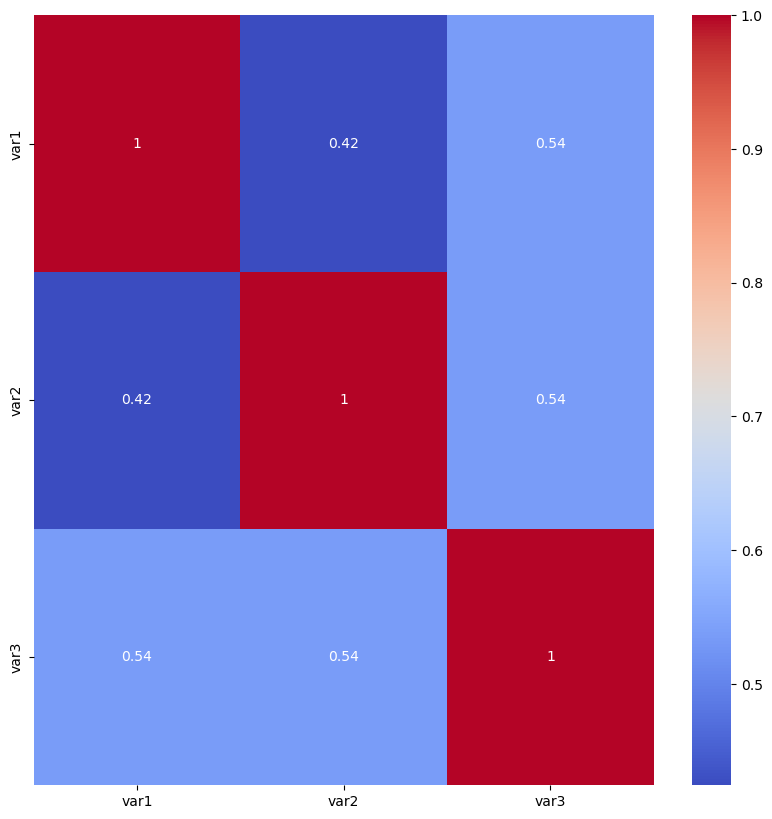

In [46]:
# compute the correlation matrix of the training set
corr_matrix = X_train.corr().abs()

# plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


We can see that our features close to each other. It means that the probability of appearing the missclassification cases are higher than usuall scenarios when everything is good.

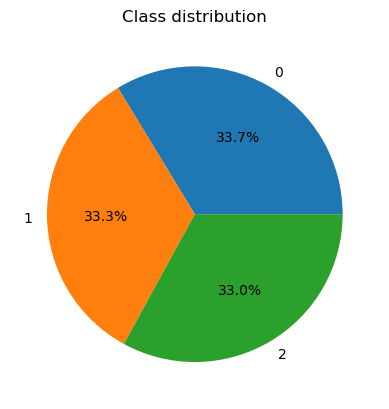

In [47]:
# check the balance of the classes in the target variable

# Identify the balance of the classes in the target variable
class_distribution = train_data['target'].value_counts()

# Display class distribution
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%')
plt.title('Class distribution')
plt.show()


#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [48]:
# import the necessary packages to solve the task
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Declare and train logistic regression with the multi_class='ovr' parameter
ovr_lr = LogisticRegression(multi_class='ovr', max_iter=1000)

# Compute the cross-validation scores
scores_ovr = cross_val_score(ovr_lr, X_train, y_train, cv=8, scoring='accuracy')

# Fit the model
ovr_lr.fit(X_train, y_train)

# Compute the predictions
y_pred_ovr = ovr_lr.predict(X_test)

# Accuracy of the model
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_ovr))

# Mean accuracy of the model
print("Mean cross-validation score:", scores_ovr.mean())


Accuracy score: 0.8
Mean cross-validation score: 0.8176247771836007


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [49]:
# Declare and train logistic regression with the multi_class='multinomial' parameter
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Compute the cross-validation scores
scores_multi = cross_val_score(multi_lr, X_train, y_train, cv=8, scoring='accuracy')

# Fit the model
multi_lr.fit(X_train, y_train)

# Compute the predictions
y_pred_multi = multi_lr.predict(X_test)

# Accuracy of the model
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_multi))

# Mean accuracy of the model
print("Mean cross-validation score:", scores_multi.mean())

Accuracy score: 0.9
Mean cross-validation score: 0.8216354723707664


I obtain interesting observation regarding the difference between accuracy score and Mean cross-validation score for my linear regression with multinomial parameter. 

This situation can happend due to the reason that the general accuracy score can sometimes give an overly optimistic view of the model's performance if the test set happens to be "easier" to predict. On the other hand, cross-validation gives a more robust estimate of the model's expected performance on unseen data, as it averages the model's performance over multiple different splits of the training data.

Tthe lower cross-validation mean score suggests that the model's performance may not be as good on unseen data as the general accuracy score might suggest.

#### Using gridsearch to tune the C value and multi class

In [50]:
# import the necessary packages to solve the task
from sklearn.model_selection import GridSearchCV

# Declare the parameters for the grid search
params = {'C': np.logspace(-10,10,7), 'multi_class': ['ovr', 'multinomial']}

# Declare a GridSearch instance with the logistic regression model and the parameters
grid_search_clf = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=params, cv=8, scoring='accuracy')

# Fit the model
grid_search_clf.fit(X_train, y_train)


GridSearchCV(cv=8, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['ovr', 'multinomial']},
             scoring='accuracy')

In [51]:
# Print the best parameters and the accuracy on the test set
print(f"Best parameters (CV score={grid_search_clf.best_score_}): {grid_search_clf.best_params_}")
print(f"Accuracy on the test set: {grid_search_clf.score(X_test, y_test)}")

Best parameters (CV score=0.82174688057041): {'C': 0.0004641588833612782, 'multi_class': 'multinomial'}
Accuracy on the test set: 0.8333333333333334


#### Comment on why one multi_class technique was better than the other

The superiority of Logistic Regression with the multinomial parameter over the ovs model in terms of accuracy is evident. This enhanced performance can be attributed to various factors. Firstly, the close correlation between the features in the dataset poses a challenge for the ovs classifier, making it difficult to accurately identify entries for each class. In contrast, the multinomial model excels in computing probabilities, thereby providing a more effective solution to the classification problem.

Additionally, the multinomial parameter accounts for the intricate relationships among features, capturing the nuances that the ovs model may overlook. This adaptability enables the multinomial logistic regression to achieve higher accuracy by taking into consideration the interdependencies within the dataset.

Furthermore, the multinomial model's ability to handle multiple classes simultaneously contributes to its superior performance. This contrasts with the ovs model, which may struggle with distinguishing between multiple classes due to the inherent complexity of the dataset.

In summary, the advantages of Logistic Regression with the multinomial parameter extend beyond mere accuracy, encompassing its capability to address correlated features, capture intricate relationships, and effectively handle multi-class classification scenarios. These attributes collectively contribute to its enhanced performance when compared to the ovs model. 

#### Create LR with the best params

In [52]:
# declare and train logistic regression with the best parameters
best_params = grid_search_clf.best_params_

best_multi_lr = LogisticRegression(C=best_params['C'], multi_class=best_params['multi_class'], max_iter=1000) 

# Fit the model
best_multi_lr.fit(X_train[['var2','var3']], y_train)

LogisticRegression(C=0.0004641588833612782, max_iter=1000,
                   multi_class='multinomial')

#### Visualize the decision boundaries

In [53]:
# Download the library packages for mlxtend ploting
%pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


/Users/ivangolov/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


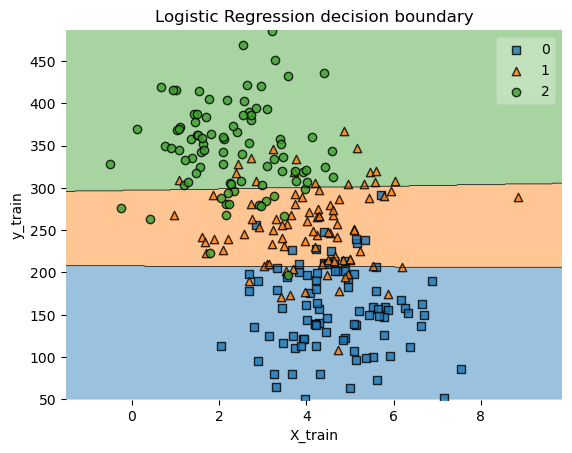

In [54]:
# import the necessary packages to solve the task
from mlxtend.plotting import plot_decision_regions

# Plot the decision boundary of the best model
plot_decision_regions(X_train[['var2','var3']].values, y_train.values, clf=best_multi_lr, legend=1)

# Add axes annotations
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

Upon analysing the decision boundary plot, it becomes obvious that our model frequently misclassifies numerous classes, despite the seemingly satisfactory accuracy metric. This discrepancy raises concerns about the model's robustness and its ability to correctly categorize instances from different classes. Overall, model do the job appropriatly and have a potentia to future tuning.